❌ Недостатки и области для улучшения
1. Имена переменных
Проблема: Использование неоднозначных имён (df, xyz_data, sales_by_item).

Улучшение:
python
Было
sales_by_item = df.groupby('item')...

Стало
product_sales_summary = df.groupby('item', as_index=False)['amount'].sum()
🔍 Best Practice: Используйте имена, отражающие смысл, а не происхождение:

client_stats → client_summary
xyz_data → demand_variability_analysis

2. Повторяющийся код в ABC/XYZ анализе
Проблема: ABC и XYZ повторяются в abc_xyz_analysis и вне её.

Улучшение:

Вынесите ABC и XYZ в отдельные функции:
python
def perform_abc_analysis(sales_df): ...
def perform_xyz_analysis(quantity_df): ...
Используйте их внутри abc_xyz_analysis.

3. Отсутствие обработки ошибок
Проблема: Код падает, если:

Файла нет,
Нет колонки tr_date,
Все quantity = 0.
Улучшение:

python
def safe_load_csv(filepath):
    try:
        df = pd.read_csv(filepath)
        required_cols = {'tr_date', 'item', 'quantity', 'amount', 'client'}
        if not required_cols.issubset(df.columns):
            raise ValueError(f"Не хватает колонок: {required_cols - set(df.columns)}")
        return df
    except Exception as e:
        print(f"Ошибка загрузки: {e}")
        return None

4. Нет документации у функций
Проблема: abc_xyz_analysis — большая функция без docstring в PEP 257.

5. Визуализация: упущенные возможности
Проблема: Нет визуализации ABC-кривой или XYZ-распределения.

Улучшение:

python
def plot_abc_curve(abc_df):
    plt.figure(figsize=(8, 5))
    plt.plot(range(len(abc_df)), abc_df['cumulative_percent'], color='b')
    plt.axhline(80, color='g', linestyle='--', label='A/B boundary')
    plt.axhline(95, color='orange', linestyle='--', label='B/C boundary')
    plt.xlabel('Количество товаров (отсортировано)')
    plt.ylabel('Накопительный % продаж')
    plt.title('ABC-анализ: кривая Парето')
    plt.legend()
    plt.grid(True)
    plt.show()


6. Избыточное использование памяти
Проблема: Несколько копий df, слияния, reset_index.

Улучшение:

Используйте copy=False где возможно.
Удаляйте ненужные столбцы.
При работе с большими данными — рассмотрите chunking или Dask.

7. Сохранение файлов: нет проверки директории
Проблема: Если папка results/ не существует — ошибка.

Улучшение:

python
import os
os.makedirs('results', exist_ok=True)
df.to_csv('results/top_5_products.csv', index=False)

8. Стиль и PEP 8
Разделяйте логические блоки пустыми строками.
Длина строк — не более 88 (по Black).
Используйте if __name__ == "__main__": для запуска анализа.
✅ Итоговые рекомендации (Best Practices)
| Категория | Рекомендация | |---------|-------------| | 🧠 Логика | Вынести ABC и XYZ в отдельные функции, избежать дублирования | | 📚 Читаемость | Использовать осмысленные имена: top_products → high_value_products | | 🧰 Надёжность | Добавить проверку данных и обработку исключений | | 📁 Структура | Организовать код в модули: analysis.py, io.py, visualization.py | | 🎨 Визуализация | Добавить ABC-кривую, heatmaps для матрицы ABC-XYZ | | 📦 Экспорт | Сохранять в подпапку, с префиксами дат: abc_analysis_202504.csv | | 🧪 Тестирование | Добавить unit-тесты для abc_xyz_analysis |

💡 Пример улучшенного подхода:
python

analysis.py
from .utils import validate_dataframe
from .abc import perform_abc_analysis
from .xyz import perform_xyz_analysis

def run_abc_xyz_analysis(df, output_dir="results"):
    validate_dataframe(df, required=['item', 'quantity', 'amount'])
    abc = perform_abc_analysis(df)
    xyz = perform_xyz_analysis(df)
    merged = pd.merge(abc, xyz, on='item')
    save_results(merged, output_dir)
    return merged

✅ Заключение:
Код функционален и логичен, но может быть существенно улучшен по масштабируемости, стабильности и читаемости.
Применение best practices сделает его пригодным для продакшена, командной разработки и повторного использования.

In [17]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd # type: ignore

# Загрузка CSV файла в DataFrame
df = pd.read_csv('transaction.csv')

# Предполагается, что колонка 'tr_date' содержит даты — преобразуем её в тип datetime
df['trDte'] = pd.to_datetime(df['trDte'], format='%d.%m.%Y')

# Вывод первых 5 строк
print("Первые 5 строк:")
print(df.head())

# Вывод основной информации о датасете
print("\nИнформация о датасете:")
print(df.info())

Первые 5 строк:
       trDte          bcode     clientID      item  \
0 2017-09-01  code000000001  client13166   sku8444   
1 2017-09-01  code000000001  client13166  sku12545   
2 2017-09-01  code000000001  client13166   sku3391   
3 2017-09-01  code000000001  client13166  sku20444   
4 2017-09-01  code000000002   client1239  sku29959   

                      itemGroup  quantity  amount  
0              Скобяные изделия         1      29  
1  Оборудование для сада и дачи         1     329  
2                   Инструменты         1     169  
3                   Инструменты         2     578  
4              Скобяные изделия         1     329  

Информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008688 entries, 0 to 1008687
Data columns (total 7 columns):
 #   Column     Non-Null Count    Dtype         
---  ------     --------------    -----         
 0   trDte      1008688 non-null  datetime64[ns]
 1   bcode      1008688 non-null  object        
 2   clientID  

In [5]:
import pandas as pd # type: ignore

# Загрузка CSV файла в DataFrame
df = pd.read_csv('transaction.csv')

# Предполагается, что колонка 'tr_date' содержит даты — преобразуем её в тип datetime
df['trDte'] = pd.to_datetime(df['trDte'], format='%d.%m.%Y')

# 1. Общая информация о DataFrame
print("=== 1. Общая информация ===")
print(f"Количество строк: {df.shape[0]}")
print(f"Количество столбцов: {df.shape[1]}")
print("\nТипы данных:")
print(df.dtypes)

# 2. Описательная статистика для числовых колонок
print("\n=== 2. Описательная статистика (quantity, amount) ===")
numeric_cols = ['quantity', 'amount']
print(df[numeric_cols].describe())

# Дополнительно: медиана (50%), если нужно выделить явно
print(f"\nМедианы:")
print(df[numeric_cols].median())

# 3. Проверка пропущенных значений
print("\n=== 3. Пропущенные значения ===")
missing = df.isnull().sum()
print(missing)
if missing.sum() == 0:
    print("Пропущенных значений нет.")
else:
    print("Есть пропущенные значения в следующих столбцах.")

# 4. Уникальные значения и диапазоны для числовых столбцов
print("\n=== 4. Уникальные значения и диапазоны ===")
for col in numeric_cols:
    unique_count = df[col].nunique()
    value_range = df[col].max() - df[col].min()
    print(f"{col}:")
    print(f"  Уникальных значений: {unique_count}")
    print(f"  Диапазон: [{df[col].min()} ; {df[col].max()}] (размах = {value_range})")

=== 1. Общая информация ===
Количество строк: 1008688
Количество столбцов: 7

Типы данных:
trDte        datetime64[ns]
bcode                object
clientID             object
item                 object
itemGroup            object
quantity              int64
amount                int64
dtype: object

=== 2. Описательная статистика (quantity, amount) ===
           quantity        amount
count  1.008688e+06  1.008688e+06
mean   2.222474e+00  6.231940e+02
std    5.029007e+00  1.878421e+03
min    0.000000e+00  0.000000e+00
25%    1.000000e+00  5.600000e+01
50%    1.000000e+00  1.500000e+02
75%    2.000000e+00  4.250000e+02
max    1.100000e+03  2.131770e+05

Медианы:
quantity      1.0
amount      150.0
dtype: float64

=== 3. Пропущенные значения ===
trDte        0
bcode        0
clientID     0
item         0
itemGroup    0
quantity     0
amount       0
dtype: int64
Пропущенных значений нет.

=== 4. Уникальные значения и диапазоны ===
quantity:
  Уникальных значений: 198
  Диапазон: [0 ; 11

In [6]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


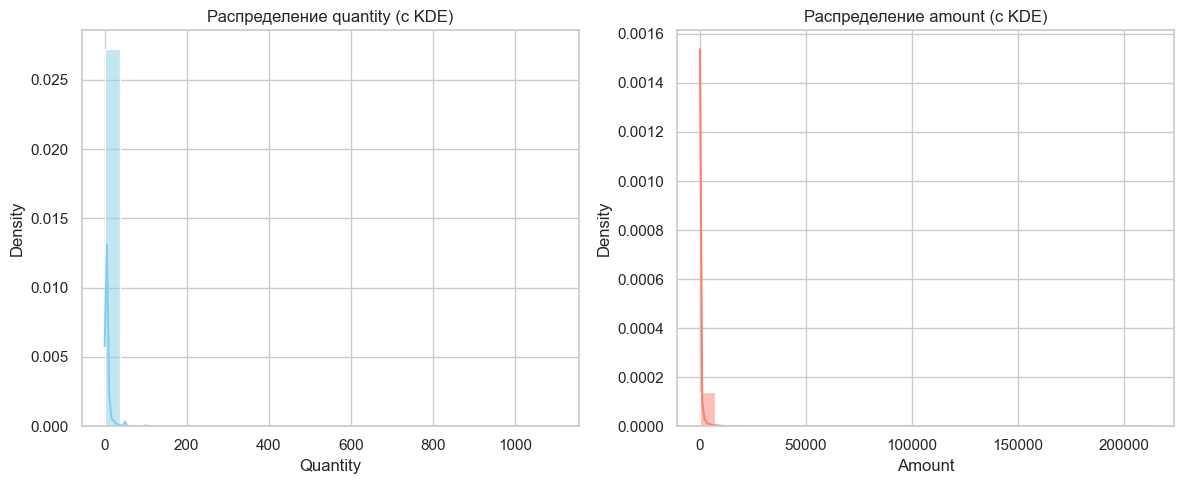

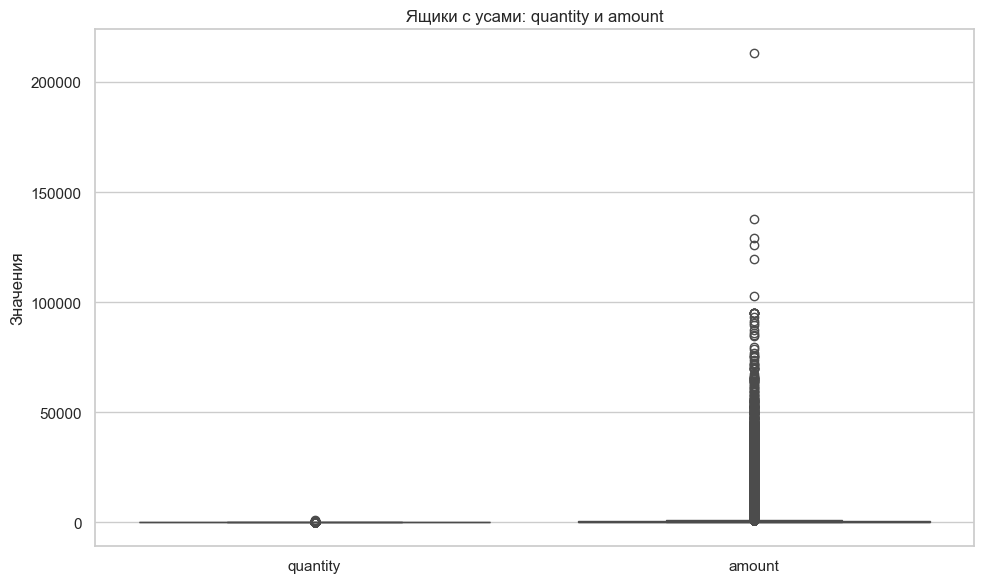

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Убедимся, что matplotlib отображает графики (актуально для Jupyter)
%matplotlib inline

# Настройка стиля seaborn
sns.set(style="whitegrid")

# === Первое окно: Гистограммы с KDE ===
plt.figure(figsize=(12, 5))

# Гистограмма для quantity
plt.subplot(1, 2, 1)
sns.histplot(df['quantity'], kde=True, bins=30, color='skyblue', stat="density")
plt.title('Распределение quantity (с KDE)')
plt.xlabel('Quantity')

# Гистограмма для amount
plt.subplot(1, 2, 2)
sns.histplot(df['amount'], kde=True, bins=30, color='salmon', stat="density")
plt.title('Распределение amount (с KDE)')
plt.xlabel('Amount')

# Оформление и отображение
plt.tight_layout()
plt.show()

# === Второе окно: Box plots ===
plt.figure(figsize=(10, 6))

# Box plot для quantity и amount
sns.boxplot(data=df[['quantity', 'amount']])
plt.title('Ящики с усами: quantity и amount')
plt.ylabel('Значения')

# Отображение графика
plt.tight_layout()
plt.show()

ТОП-5 по сумме продаж

In [22]:
# Группируем по 'item', агрегируем сумму по 'amount', сортируем по убыванию и берём ТОП-5
top_5_items_by_sales = (
    df.groupby('item', as_index=False)
    .agg({'amount': 'sum'})
    .rename(columns={'amount': 'total_sales'})
    .sort_values(by='total_sales', ascending=False)
    .head(5)
)

# Вывод результата
print("ТОП-5 товаров по сумме продаж:")
print(top_5_items_by_sales)

ТОП-5 товаров по сумме продаж:
           item  total_sales
17951  sku26161      5373638
9108   sku18199      3951361
13270  sku21947      3918570
20133  sku28128      3027786
28728   sku8342      2113158


In [23]:
# Группировка по 'item' и агрегация сумм по quantity и amount
top_5_products = (df.groupby('item', as_index=False)
                  .agg({'quantity': 'sum', 'amount': 'sum'})
                  .rename(columns={'quantity': 'total_quantity', 'amount': 'total_amount'})
                  .sort_values(by='total_amount', ascending=False)
                  .head(5)
                 )

# Вывод результата
print("ТОП-5 товаров по сумме продаж:")
print(top_5_products)

ТОП-5 товаров по сумме продаж:
           item  total_quantity  total_amount
17951  sku26161           18902       5373638
9108   sku18199            7250       3951361
13270  sku21947           15304       3918570
20133  sku28128            7705       3027786
28728   sku8342            3512       2113158


ПАРАМЕТРИЗАЦИЯ

In [24]:
def get_top_products(df, n=5):
    """
    Возвращает ТОП-N товаров по сумме продаж.
    
    Параметры:
    df (pd.DataFrame): DataFrame с колонками 'item', 'quantity', 'amount'
    n (int): Количество топ-товаров для возврата (по умолчанию 5)
    
    Возвращает:
    pd.DataFrame: ТОП-N товаров с общей суммой и количеством продаж
    """
    top_n_products = (df.groupby('item', as_index=False)
                      .agg({'quantity': 'sum', 'amount': 'sum'})
                      .rename(columns={'quantity': 'total_quantity', 'amount': 'total_amount'})
                      .sort_values(by='total_amount', ascending=False)
                      .head(n)
                     )
    return top_n_products

# Примеры использования функции:

# ТОП-5 товаров
print("ТОП-5 товаров:")
print(get_top_products(df, n=5))
print("\n" + "="*50 + "\n")

# ТОП-3 товара
print("ТОП-3 товара:")
print(get_top_products(df, n=3))
print("\n" + "="*50 + "\n")

# ТОП-10 товаров
print("ТОП-10 товаров:")
print(get_top_products(df, n=10))


ТОП-5 товаров:
           item  total_quantity  total_amount
17951  sku26161           18902       5373638
9108   sku18199            7250       3951361
13270  sku21947           15304       3918570
20133  sku28128            7705       3027786
28728   sku8342            3512       2113158


ТОП-3 товара:
           item  total_quantity  total_amount
17951  sku26161           18902       5373638
9108   sku18199            7250       3951361
13270  sku21947           15304       3918570


ТОП-10 товаров:
           item  total_quantity  total_amount
17951  sku26161           18902       5373638
9108   sku18199            7250       3951361
13270  sku21947           15304       3918570
20133  sku28128            7705       3027786
28728   sku8342            3512       2113158
21796  sku29626           13669       1973964
29479   sku9018            3299       1706341
29981   sku9471            5045       1675843
16744  sku25074            6125       1668585
19760  sku27791            8384

In [25]:
import pandas as pd

# 1. Конечная дата
end_date = pd.Timestamp('2019-10-31')

# 2. Количество месяцев для анализа
period_months = 6

# 3. Начальная дата: отнимаем 6 месяцев
start_date = end_date - pd.DateOffset(months=period_months)

# Предполагается, что колонка 'tr_date' содержит даты — преобразуем её в тип datetime
df['trDte'] = pd.to_datetime(df['trDte'], format='%d.%m.%Y')

# 4. Фильтрация DataFrame по дате
filtered_df = df[(df['trDte'] >= start_date) & (df['trDte'] <= end_date)]

# 5. Применяем функцию get_top_products к отфильтрованным данным
top_5_recent = get_top_products(filtered_df, n=5)

# 6. Вывод результата
print(f"ТОП-5 товаров по продажам за период с {start_date.date()} по {end_date.date()}:")
print(top_5_recent)

ТОП-5 товаров по продажам за период с 2019-04-30 по 2019-10-31:
           item  total_quantity  total_amount
12844  sku26161            7993       2379453
6502   sku18199            3066       1848072
9508   sku21947            5831       1543669
20515   sku8342            1509        970053
9721   sku22208              89        896275


Группировка по клиентам. Разведочный анализ

In [26]:
# 1. Группировка по клиенту с агрегацией нужных метрик
client_stats = (df.groupby('clientID', as_index=False)
                .agg({
                    'quantity': 'sum',
                    'amount': 'sum',
                    'trDte': 'nunique'  # количество уникальных дат покупок (визитов)
                })
                .rename(columns={
                    'quantity': 'total_quantity',
                    'amount': 'total_amount',
                    'trDte': 'visit_count'
                })
                .sort_values(by='total_amount', ascending=False)
               )

# 2. Вывод общей таблицы (опционально)
print("Статистика по клиентам (отсортировано по сумме закупок):")
print(client_stats.head())

# 3. Вывод статистики по столбцам
print("\n=== Статистика по метрикам ===")

# Для quantity
print("\nКоличество товаров (quantity):")
print(f"  min:  {client_stats['total_quantity'].min()}")
print(f"  max:  {client_stats['total_quantity'].max()}")
print(f"  mean: {client_stats['total_quantity'].mean():.2f}")
print(f"  median: {client_stats['total_quantity'].median()}")

# Для amount
print("\nСумма закупок (amount):")
print(f"  min:  {client_stats['total_amount'].min()}")
print(f"  max:  {client_stats['total_amount'].max()}")
print(f"  mean: {client_stats['total_amount'].mean():.2f}")
print(f"  median: {client_stats['total_amount'].median()}")

# Для количества визитов
print("\nКоличество визитов (visit_count):")
print(f"  min:  {client_stats['visit_count'].min()}")
print(f"  max:  {client_stats['visit_count'].max()}")
print(f"  mean: {client_stats['visit_count'].mean():.2f}")


Статистика по клиентам (отсортировано по сумме закупок):
          clientID  total_quantity  total_amount  visit_count
21313  client29182            3434       3887309          107
6283   client15654            5457       1443255          174
41389   client8778            1617        986618           17
7823    client1704            1187        636101           23
25592  client33032            1255        537397           74

=== Статистика по метрикам ===

Количество товаров (quantity):
  min:  1
  max:  5457
  mean: 52.44
  median: 21.0

Сумма закупок (amount):
  min:  10
  max:  3887309
  mean: 14705.66
  median: 6410.0

Количество визитов (visit_count):
  min:  1
  max:  174
  mean: 6.18


In [27]:
# 1. Фильтрация клиентов по условиям: quantity >= 2000 ИЛИ amount >= 500000
filtered_clients = client_stats[
    (client_stats['total_quantity'] >= 2000) | 
    (client_stats['total_amount'] >= 500000)
]

# 2. Вывод количества и списка клиентов
print(f"Найдено клиентов, удовлетворяющих условиям: {len(filtered_clients)}")
print("\nСписок таких клиентов:")

# 3. Вывод характеристик отобранных клиентов
print(filtered_clients)

# 4. Опционально: сохранение ID (имён) клиентов в список
extreme_clients = filtered_clients['clientID'].tolist()

# Пример вывода списка
print("\nID этих клиентов (для дальнейшего анализа):")
print(extreme_clients)


Найдено клиентов, удовлетворяющих условиям: 9

Список таких клиентов:
          clientID  total_quantity  total_amount  visit_count
21313  client29182            3434       3887309          107
6283   client15654            5457       1443255          174
41389   client8778            1617        986618           17
7823    client1704            1187        636101           23
25592  client33032            1255        537397           74
30646  client37582            2526        502515          159
23307  client30977            2234        407138          121
26757  client34081            2470        386355          157
11458  client20310            3265        366035          102

ID этих клиентов (для дальнейшего анализа):
['client29182', 'client15654', 'client8778', 'client1704', 'client33032', 'client37582', 'client30977', 'client34081', 'client20310']


In [28]:
# 1. Фильтрация клиентов с количеством визитов == 1
one_time_clients = client_stats[client_stats['visit_count'] == 1]

# 2. Подсчет количества таких клиентов
num_one_time_clients = len(one_time_clients)

# 3. Расчет метрик
if num_one_time_clients > 0:
    avg_check = one_time_clients['total_amount'].mean()  # средний чек
    avg_quantity = one_time_clients['total_quantity'].mean()  # средний объем
else:
    avg_check = 0
    avg_quantity = 0

# Вывод результатов
print("=== Анализ клиентов с одним визитом ===")
print(f"Количество клиентов с одним визитом: {num_one_time_clients}")
print(f"Средний чек (средняя сумма закупки): {avg_check:.2f}")
print(f"Средний объем покупки (количество товаров): {avg_quantity:.2f}")


=== Анализ клиентов с одним визитом ===
Количество клиентов с одним визитом: 12859
Средний чек (средняя сумма закупки): 3535.45
Средний объем покупки (количество товаров): 8.67


In [30]:
# 1. Проверка на строки с quantity = 0
zero_quantity = df[df['quantity'] == 0]
count_zero = len(zero_quantity)

print(f"Количество строк с quantity = 0: {count_zero}")

if count_zero > 0:
    print("Примеры строк с quantity = 0:")
    print(zero_quantity.head())
    # Удаление строк с quantity = 0
    df = df[df['quantity'] != 0]
    print("Строки с quantity = 0 удалены.")
else:
    print("Строки с quantity = 0 отсутствуют.")

# 2. Создание столбца 'price' = amount / quantity
df['price'] = df['amount'] / df['quantity']

# 3. Статистика по новому столбцу 'price'
print("\n=== Статистика по средней цене (price) ===")
print(f"min:    {df['price'].min():.2f}")
print(f"max:    {df['price'].max():.2f}")
print(f"mean:   {df['price'].mean():.2f}")
print(f"median: {df['price'].median():.2f}")

# 4. Вывод первых 10 строк с новым столбцом
print("\n=== Первые 10 строк с новым столбцом 'price' ===")
print(df.head(10))


Количество строк с quantity = 0: 1
Примеры строк с quantity = 0:
            trDte          bcode     clientID      item         itemGroup  \
920771 2019-09-14  code000261741  client24307  sku26360  Скобяные изделия   

        quantity  amount  
920771         0       1  
Строки с quantity = 0 удалены.

=== Статистика по средней цене (price) ===
min:    0.00
max:    119500.00
mean:   389.78
median: 102.89

=== Первые 10 строк с новым столбцом 'price' ===
       trDte          bcode     clientID      item  \
0 2017-09-01  code000000001  client13166   sku8444   
1 2017-09-01  code000000001  client13166  sku12545   
2 2017-09-01  code000000001  client13166   sku3391   
3 2017-09-01  code000000001  client13166  sku20444   
4 2017-09-01  code000000002   client1239  sku29959   
5 2017-09-01  code000000002   client1239  sku19394   
6 2017-09-01  code000000002   client1239   sku9916   
7 2017-09-01  code000000002   client1239  sku27003   
8 2017-09-01  code000000002   client1239  sku15395   


=== Статистика по цене (price) ===
Минимум:        0.00
25% (Q1):        39.00
50% (Медиана):   102.89
75% (Q3):        269.00
Максимум:        119500.00
IQR (Q3 - Q1):   230.00
Нижняя граница выбросов: -306.00
Верхняя граница выбросов: 614.00

Количество выбросов по цене: 112596

--- 10 самых дешёвых выбросов ---
            item       price  quantity  amount
393100  sku17951  614.142857        14    8598
393099  sku16711  614.166667        12    7370
499700  sku18205  614.500000        14    8603
560204   sku1112  614.500000         2    1229
693758  sku18389  614.666667         6    3688
353878   sku7572  614.666667         3    1844
643756  sku19659  614.750000         4    2459
867779  sku10097  614.800000         5    3074
476533  sku19659  614.833333         6    3689
906730  sku19659  614.833333         6    3689

--- 10 самых дорогих выбросов ---
            item     price  quantity  amount
734936   sku8449  119500.0         1  119500
242769   sku6834   76990.0         1   769

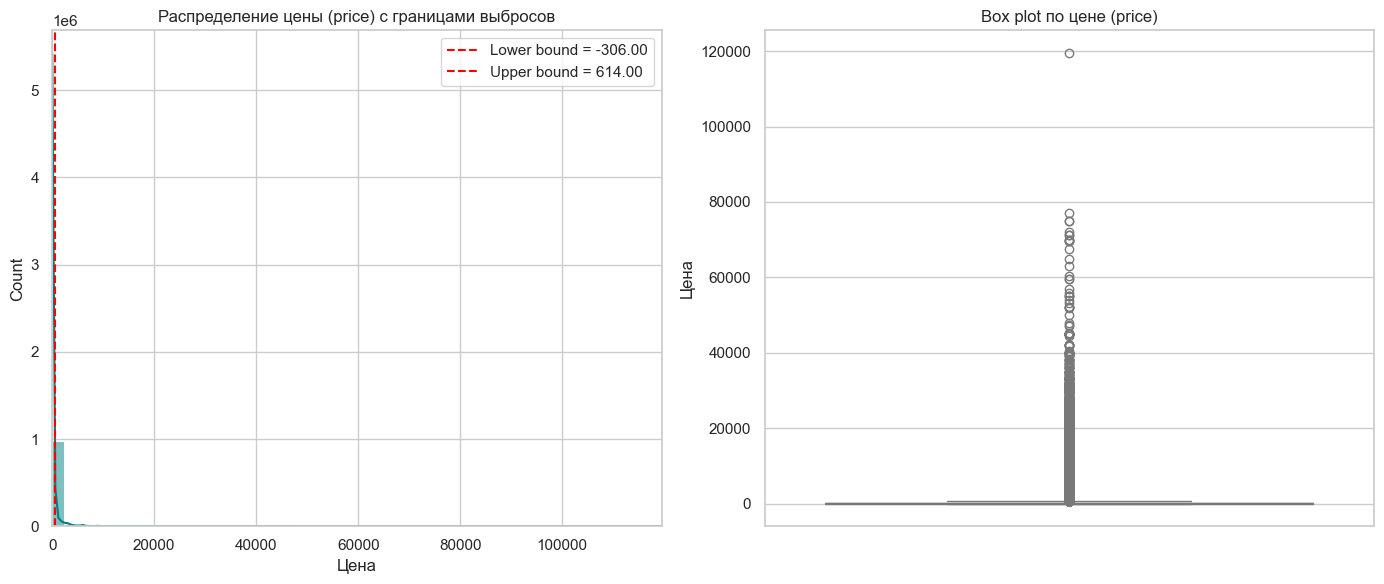

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Описательная статистика по 'price'
q1 = df['price'].quantile(0.25)
q3 = df['price'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

print("=== Статистика по цене (price) ===")
print(f"Минимум:        {df['price'].min():.2f}")
print(f"25% (Q1):        {q1:.2f}")
print(f"50% (Медиана):   {df['price'].median():.2f}")
print(f"75% (Q3):        {q3:.2f}")
print(f"Максимум:        {df['price'].max():.2f}")
print(f"IQR (Q3 - Q1):   {iqr:.2f}")
print(f"Нижняя граница выбросов: {lower_bound:.2f}")
print(f"Верхняя граница выбросов: {upper_bound:.2f}")

# 2. Фильтрация выбросов
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
print(f"\nКоличество выбросов по цене: {len(outliers)}")

# 3. Примеры выбросов
print("\n--- 10 самых дешёвых выбросов ---")
print(outliers.sort_values(by='price').head(10)[['item', 'price', 'quantity', 'amount']])

print("\n--- 10 самых дорогих выбросов ---")
print(outliers.sort_values(by='price', ascending=False).head(10)[['item', 'price', 'quantity', 'amount']])

# 4. Визуализация: гистограмма и boxplot
plt.figure(figsize=(14, 6))

# Гистограмма
plt.subplot(1, 2, 1)
sns.histplot(df['price'], bins=50, kde=True, color='teal')
plt.axvline(lower_bound, color='red', linestyle='--', label=f'Lower bound = {lower_bound:.2f}')
plt.axvline(upper_bound, color='red', linestyle='--', label=f'Upper bound = {upper_bound:.2f}')
plt.title('Распределение цены (price) с границами выбросов')
plt.xlabel('Цена')
plt.legend()
plt.xlim(df['price'].min(), df['price'].max())  # чтобы не уходить в выбросы

# Box plot
plt.subplot(1, 2, 2)
sns.boxplot(y=df['price'], color='lightblue')
plt.title('Box plot по цене (price)')
plt.ylabel('Цена')

plt.tight_layout()
plt.show()


In [8]:
# 1. Группировка по товару и расчёт суммы продаж
sales_by_item = df.groupby('item', as_index=False)['amount'].sum()
sales_by_item = sales_by_item.rename(columns={'amount': 'total_sales'})

# 2. Сортировка по сумме продаж в порядке убывания
sales_by_item = sales_by_item.sort_values(by='total_sales', ascending=False).reset_index(drop=True)

# 3. Расчёт накопительного процента
total_sum = sales_by_item['total_sales'].sum()
sales_by_item['cumulative_sum'] = sales_by_item['total_sales'].cumsum()
sales_by_item['cumulative_percent'] = (sales_by_item['cumulative_sum'] / total_sum) * 100

# 4. Присвоение группы A, B, C
def assign_abc_group(percent):
    if percent <= 80:
        return 'A'
    elif percent <= 95:
        return 'B'
    else:
        return 'C'

sales_by_item['abc_group'] = sales_by_item['cumulative_percent'].apply(assign_abc_group)

# 5. Вывод количества товаров в каждой группе и примеров
group_counts = sales_by_item['abc_group'].value_counts().sort_index()
print("=== Количество товаров по группам ABC ===")
print(group_counts)

print("\n=== Примеры товаров из каждой группы ===")

for group in ['A', 'B', 'C']:
    sample = sales_by_item[sales_by_item['abc_group'] == group].head(3)
    print(f"\nГруппа {group}:")
    print(sample[['item', 'total_sales', 'cumulative_percent']].round(2))


=== Количество товаров по группам ABC ===
abc_group
A     5353
B     8234
C    16979
Name: count, dtype: int64

=== Примеры товаров из каждой группы ===

Группа A:
       item  total_sales  cumulative_percent
0  sku26161      5373638                0.85
1  sku18199      3951361                1.48
2  sku21947      3918570                2.11

Группа B:
          item  total_sales  cumulative_percent
5353  sku10822        22836               80.00
5354  sku10724        22834               80.01
5355  sku29015        22826               80.01

Группа C:
           item  total_sales  cumulative_percent
13587  sku18189         5357                95.0
13588  sku13438         5357                95.0
13589    sku872         5357                95.0


In [33]:
# XYZ-анализ по количеству (quantity) для каждого товара

# 1. Группировка по товару и расчёт среднего и стандартного отклонения количества
xyz_data = df.groupby('item').agg(
    mean_quantity=('quantity', 'mean'),
    std_quantity=('quantity', 'std')
).reset_index()

# Замена NaN в std (если у товара только одна продажа)
xyz_data['std_quantity'] = xyz_data['std_quantity'].fillna(0)

# 2. Расчёт коэффициента вариации (CV) в процентах
xyz_data['cv_percent'] = (xyz_data['std_quantity'] / xyz_data['mean_quantity']) * 100

# Избегаем бесконечности (деление на 0)
xyz_data['cv_percent'] = xyz_data['cv_percent'].replace([float('inf'), -float('inf')], 0)

# 3. Присвоение группы X, Y, Z
def assign_xyz_group(cv):
    if cv < 15:
        return 'X'
    elif 15 <= cv <= 25:
        return 'Y'
    else:
        return 'Z'

xyz_data['xyz_group'] = xyz_data['cv_percent'].apply(assign_xyz_group)

# 4. Вывод количества товаров в каждой группе
group_counts = xyz_data['xyz_group'].value_counts().sort_index()
print("=== Количество товаров по группам XYZ ===")
print(group_counts)

# 5. Вывод итогового датафрейма
print("\n=== Итоговый датафрейм XYZ-анализа ===")
print(xyz_data.head(10))  # Пример первых 10 строк


=== Количество товаров по группам XYZ ===
xyz_group
X    11655
Y     1354
Z    17557
Name: count, dtype: int64

=== Итоговый датафрейм XYZ-анализа ===
       item  mean_quantity  std_quantity  cv_percent xyz_group
0      sku1       1.375000      0.517549   37.639940         Z
1     sku10       2.000000      1.224745   61.237244         Z
2    sku100       1.396552      0.883465   63.260430         Z
3   sku1000       1.268293      0.667569   52.635279         Z
4  sku10000       2.483871      2.908275  117.086403         Z
5  sku10001       2.000000      2.408319  120.415946         Z
6  sku10002       1.000000      0.000000    0.000000         X
7  sku10003       1.000000      0.000000    0.000000         X
8  sku10004       4.333333      6.218253  143.498139         Z
9  sku10005       1.000000      0.000000    0.000000         X


In [34]:
# Объединим результаты ABC и XYZ анализов по 'item'
abc_data = sales_by_item[['item', 'abc_group']]  # из предыдущего ABC-анализа
xyz_data = xyz_data[['item', 'xyz_group']]       # из XYZ-анализа

# Слияние данных по товару
abc_xyz_merge = pd.merge(abc_data, xyz_data, on='item', how='inner')

# Создание сводной таблицы (перекрёстная таблица ABC x XYZ)
pivot_abc_xyz = pd.crosstab(
    abc_xyz_merge['abc_group'],
    abc_xyz_merge['xyz_group'],
    margins=True,
    margins_name='Total'
)

# Вывод матрицы ABC-XYZ
print("=== Матрица ABC-XYZ (перекрёстная таблица) ===")
print(pivot_abc_xyz)

# Дополнительно: можно вывести процентное распределение
print("\n=== Процентное распределение групп ===")
pivot_percent = pd.crosstab(
    abc_xyz_merge['abc_group'],
    abc_xyz_merge['xyz_group']
).apply(lambda r: r / r.sum().sum() * 100, axis=None).round(2)
print(pivot_percent)


=== Матрица ABC-XYZ (перекрёстная таблица) ===
xyz_group      X     Y      Z  Total
abc_group                           
A           1527   297   3529   5353
B           2562   411   5261   8234
C           7566   646   8767  16979
Total      11655  1354  17557  30566

=== Процентное распределение групп ===


ValueError: No axis named None for object type DataFrame

In [35]:
# Объединим результаты ABC и XYZ анализов по 'item'
abc_data = sales_by_item[['item', 'abc_group']]  # из предыдущего ABC-анализа
xyz_data = xyz_data[['item', 'xyz_group']]       # из XYZ-анализа

# Слияние данных по товару
abc_xyz_merge = pd.merge(abc_data, xyz_data, on='item', how='inner')

# Создание сводной таблицы (перекрёстная таблица ABC x XYZ)
pivot_abc_xyz = pd.crosstab(
    abc_xyz_merge['abc_group'],
    abc_xyz_merge['xyz_group'],
    margins=True,
    margins_name='Total'
)

# Вывод матрицы ABC-XYZ
print("=== Матрица ABC-XYZ (перекрёстная таблица) ===")
print(pivot_abc_xyz)

# Дополнительно: процентное распределение от общего количества товаров
print("\n=== Процентное распределение групп (от общего числа) ===")
total_count = pivot_abc_xyz.loc['Total', 'Total']  # Общее количество товаров
pivot_percent = pivot_abc_xyz.apply(lambda row: row / total_count * 100, axis=1)  # по строкам
print(pivot_percent.round(2))


=== Матрица ABC-XYZ (перекрёстная таблица) ===
xyz_group      X     Y      Z  Total
abc_group                           
A           1527   297   3529   5353
B           2562   411   5261   8234
C           7566   646   8767  16979
Total      11655  1354  17557  30566

=== Процентное распределение групп (от общего числа) ===
xyz_group      X     Y      Z   Total
abc_group                            
A           5.00  0.97  11.55   17.51
B           8.38  1.34  17.21   26.94
C          24.75  2.11  28.68   55.55
Total      38.13  4.43  57.44  100.00


In [37]:
import pandas as pd

def abc_xyz_analysis(df, abc_threshold_a=80, abc_threshold_b=95):
    """
    Полный ABC-XYZ анализ по товарам.
    
    Параметры:
    df (pd.DataFrame): исходный DataFrame с колонками 'item', 'quantity', 'amount'
    abc_threshold_a (float): верхняя граница для группы A (по умолч. 80%)
    abc_threshold_b (float): верхняя граница для группы B (по умолч. 95%)
    
    Возвращает:
    pd.DataFrame: таблица с item, abc_group, xyz_group
    """
    
    # ABC-анализ по сумме продаж
    sales_by_item = df.groupby('item', as_index=False)['amount'].sum()
    sales_by_item = sales_by_item.sort_values(by='amount', ascending=False).reset_index(drop=True)
    total_sales = sales_by_item['amount'].sum()
    sales_by_item['cumulative_sum'] = sales_by_item['amount'].cumsum()
    sales_by_item['cumulative_percent'] = (sales_by_item['cumulative_sum'] / total_sales) * 100

    def assign_abc_group(percent):
        if percent <= abc_threshold_a:
            return 'A'
        elif percent <= abc_threshold_b:
            return 'B'
        else:
            return 'C'
    
    sales_by_item['abc_group'] = sales_by_item['cumulative_percent'].apply(assign_abc_group)
    
    # XYZ-анализ по количеству
    xyz_data = df.groupby('item').agg(
        mean_quantity=('quantity', 'mean'),
        std_quantity=('quantity', 'std')
    ).reset_index()
    
    xyz_data['std_quantity'] = xyz_data['std_quantity'].fillna(0)
    xyz_data['cv_percent'] = (xyz_data['std_quantity'] / xyz_data['mean_quantity']) * 100
    xyz_data['cv_percent'] = xyz_data['cv_percent'].replace([float('inf'), -float('inf')], 0)
    
    def assign_xyz_group(cv):
        if cv < 15:
            return 'X'
        elif 15 <= cv <= 25:
            return 'Y'
        else:
            return 'Z'
    
    xyz_data['xyz_group'] = xyz_data['cv_percent'].apply(assign_xyz_group)
    
    # Объединение ABC и XYZ
    result = pd.merge(sales_by_item[['item', 'abc_group']], 
                      xyz_data[['item', 'xyz_group']], on='item')
    
    return result


# === 1. Фильтрация данных за последние 6 месяцев: 2019-05-01 — 2019-10-31 ===
start_date_6m = pd.Timestamp('2019-05-01')
end_date_6m = pd.Timestamp('2019-10-31')

df_last_6m = df[(df['trDte'] >= start_date_6m) & (df['trDte'] <= end_date_6m)]

# === 2. Запуск анализа для всего периода и за последние 6 месяцев ===
full_period = abc_xyz_analysis(df)
recent_period = abc_xyz_analysis(df_last_6m)

# === 3. Сравнение: только товары, присутствующие в обоих периодах ===
common_items = pd.merge(full_period, recent_period, on='item', suffixes=('_full', '_recent'))

# Сколько товаров перешло из группы в группу?
print("=== Сравнение ABC-групп ===")
group_changes_abc = common_items[
    common_items['abc_group_full'] != common_items['abc_group_recent']
]
print(f"Количество товаров, сменивших ABC-группу: {len(group_changes_abc)}")
print("\nТовары, изменившие ABC-группу:")
print(group_changes_abc[['item', 'abc_group_full', 'abc_group_recent']])

print("\n=== Сравнение XYZ-групп ===")
group_changes_xyz = common_items[
    common_items['xyz_group_full'] != common_items['xyz_group_recent']
]
print(f"Количество товаров, сменивших XYZ-группу: {len(group_changes_xyz)}")


# === Кто стал важнее / менее важен? ===
# Используем ABC-группу как индикатор важности: A > B > C

def rank_abc(group):
    return {'A': 3, 'B': 2, 'C': 1}[group]

common_items['importance_full'] = common_items['abc_group_full'].map(rank_abc)
common_items['importance_recent'] = common_items['abc_group_recent'].map(rank_abc)
common_items['importance_change'] = common_items['importance_recent'] - common_items['importance_full']

improved = common_items[common_items['importance_change'] > 0]
declined = common_items[common_items['importance_change'] < 0]

print("\n=== Товары, ставшие важнее (перешли в более приоритетную ABC-группу) ===")
print(improved[['item', 'abc_group_full', 'abc_group_recent']])

print("\n=== Товары, ставшие менее важными (перешли в менее приоритетную ABC-группу) ===")
print(declined[['item', 'abc_group_full', 'abc_group_recent']])

=== Сравнение ABC-групп ===
Количество товаров, сменивших ABC-группу: 4302

Товары, изменившие ABC-группу:
           item abc_group_full abc_group_recent
6       sku9471              A                C
127     sku8752              A                B
235     sku9350              A                C
250    sku27764              A                B
276     sku6216              A                C
...         ...            ...              ...
13781  sku15934              C                B
13791  sku22771              C                B
13826   sku3465              C                B
13827  sku10096              C                B
13831  sku30345              C                B

[4302 rows x 3 columns]

=== Сравнение XYZ-групп ===
Количество товаров, сменивших XYZ-группу: 4220

=== Товары, ставшие важнее (перешли в более приоритетную ABC-группу) ===
           item abc_group_full abc_group_recent
4521   sku10822              B                A
4522   sku10724              B                